### Instructions
A - above
B - below
X - delete 
Ctrl Enter - run
Enter - Enter into cell
M - make cell into markdown cell

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import sklearn

# TASK 1 - MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Extract the inputs.
inputs = data.values[0:,:8].astype(float)
targets = data.values[:,8:].astype(float)
#Normalize the inputs and targets with scaler.
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)
scaled_targets = scaler.fit_transform(targets)

print("Inputs")
print(scaled_inputs)
print("Targets")
print(scaled_targets)

In [ ]:
NN = MLPRegressor(max_iter=5000)
NN.fit(scaled_inputs, scaled_targets)
outputs = NN.predict(scaled_inputs)
print("MLP Regressor: \n", outputs)

# TASK 2 - OPTIMISATION

In [3]:
def generate_timetable():
    """
    Generates a timetable.
    Read the file to see how many classes + labs there are.
    Store them in a 20x3 list alongside empty sessions to fill the list
    """
    #Create "empty" timetable
    timetable = [["empty" for x in range(3)] for y in range(20)] 
    
    #Read file into allSplits list
    allSplits = []
    f = open("modules.txt", 'r')
    lineCount = 0
    for line in f:
        allSplits.append(line.split("|"))
        lineCount+=1
    f.close()
    
    #Add module into timetable
    for i in range(0,lineCount):
        timetable[i][0] = allSplits[i][0]
    
    
    #Add seminars into timetable.
    #Iterate through each module, for each number of seminars use
    #counters to iterate to next empty position and place seminar.
    #Should work on different set of modules if format is kept identical.
    emptyChecker = 0
    emptyChecker1 = 0
    for i in range(0, lineCount):
        for j in range(0, int(allSplits[i][2])):
            toggle = False
            while toggle == False:
                if timetable[emptyChecker][emptyChecker1] == "empty":
                    timetable[emptyChecker][emptyChecker1] = allSplits[i][0]
                    toggle = True
                emptyChecker1+=1
                if emptyChecker1 == 3:
                    emptyChecker+=1
                    emptyChecker1=0
    
    #randomises through randomise function below
    #randomSwitch = False
    #while randomSwitch == False:
    randomise_timetable(timetable)
        #randomSwitch = room_validity(timetable)
    return timetable

In [11]:
def randomise_timetable(timetable):
    #Create randomised timetable
    #Add lectures to lec. list and labs to lab list
    #Shuffle lists
    #Put back into timetable
    
    lecturesJoined = []
    labsJoined = []
    for i in range(len(timetable)):
        for j in range(0,len(timetable[i]), len(timetable[i])):
            lecturesJoined.append(timetable[i][j])
            labsJoined.append(timetable[i][j+1])
            labsJoined.append(timetable[i][j+2])
    np.random.shuffle(lecturesJoined)
    np.random.shuffle(labsJoined)
    counterLecs = 0
    counterLabs = 0
    for i in range(0,len(timetable)):
        for j in range(0,len(timetable[i]), len(timetable[i])):
            timetable[i][j] = lecturesJoined[counterLecs]
            timetable[i][j+1] = labsJoined[counterLabs]
            timetable[i][j+2] = labsJoined[counterLabs+1]
            counterLecs+=1
            counterLabs+=2

    return timetable

In [19]:
def fitness_function(timetable):
    #Calculates fitness of given timetable
    
    allSplits = []
    f = open("modules.txt", 'r')
    lineCount = 0
    for line in f:
        allSplits.append(line.split("|"))
        lineCount+=1
    f.close()
    
    modSplits = []
    modConstraintSplits = []
    for line in allSplits:
        modSplits.append(line[0])
        modConstraintSplits.append(line[3])
    """
    CONSTRAINTS:
    1) ONLY 1 LECTURE AND TWO LABS MAY RUN CONCURRENTLY
    2) LABS FOR A MODULE MAY ONLY OCCUR AFTER ITS LECTURE! PRECEDENCE!
    3) SESSIONS CAN'T INTERFERE! CONCURRENCE!
    """
    #Precedence constraints
    precConstraints = 1
    #module loop
    for i in range(0, len(timetable)):
        module = timetable[i][0]
        if module == "empty":
            continue
        #all of the timetable lab loop
        for j in range(0, len(timetable)):
            if j > i:
                break
            for l in range(1, len(timetable[j])):
                if module == timetable[j][l]:
                    precConstraints+=1
            
    
    #Concurrency constraints
    #Functional and clean, aside from try catch section which only caters to list length 3.
    concConstraints = 1
    #Cycle through each session
    for i in range(0,len(timetable)):
        #Cycle through each room
        for j in range(0,len(timetable[i])):
            if timetable[i][j] == "empty":
                continue
            constraintModules = []
            pos1 = modSplits.index(timetable[i][j])
            clashes1 = modConstraintSplits[pos1]
            #2nd cycle through each room, linear comparison of modules and clashes
            for k in range(j,len(timetable[i])):
                if k == j or timetable[i][k] == "empty":
                    continue
                else:
                    pos2 = modSplits.index(timetable[i][k])
                    clashes2 = modConstraintSplits[pos2]
                    if timetable[i][j] == timetable[i][k] or timetable[i][j] in clashes2 or timetable[i][k] in clashes1:
                        concConstraints+=1

    return precConstraints * concConstraints

In [17]:
def mutation_swap(timetable):
    #This function swaps two modules at random.
    #Must be modified for another timetable as it's specific to
    #this problem and its room (1 theatre 2 lab) constraints. 
    moduleIndex = []
    tim = len(timetable)-1
    tim2 = len(timetable[0])-1
    moduleIndex.append(np.random.randint(0,tim))
    moduleIndex.append(np.random.randint(0,tim2)) 
    whileToggle = False
    x = np.random.randint(0,tim)
    if moduleIndex[1] == 0:
        y = 0
    else:
        y = np.random.randint(1, tim2) 
    #While loop ensures randomly selected modules aren't the same module (x and y indexes arent both equal)
    while whileToggle == False:
        if x == moduleIndex[0] and y == moduleIndex[1]:
            x = np.random.randint(0,tim)
            y = np.random.randint(0,tim2)
        else:
            whileToggle = True
    moduleIndex.append(x)
    moduleIndex.append(y)
    mod1 = timetable[moduleIndex[0]][moduleIndex[1]]
    mod2 = timetable[moduleIndex[2]][moduleIndex[3]]
    timetable[moduleIndex[0]][moduleIndex[1]] = mod2
    timetable[moduleIndex[2]][moduleIndex[3]] = mod1
    return timetable
    

In [7]:
def mutation_ruin_and_run(timetable):
    #randomises given timetable
    return randomise_timetable(timetable)

In [8]:
#Objective Function for current coursework problem.
def comparison_lower(a, b):
    return b <= a

In [9]:
def hillclimber(itInt, timetable, problem, mutation, comparison):
    #itInt = no. of iterations
    #problem = fitness calculator
    #mutation = function by which to change decision variable
    #decision variable is the timetable, generated within the function!
    #comparison = objective function for current optimisation goal
    
    parent = timetable
    #for i in range(0,len(parent)):
        #print(parent[i])
    parentFitness = problem(parent)
    
    #Loop for itint no. of times
    fitnessList = []
    for iter in range(itInt):
        #if iter % 100 == 0:
            #print(f"Progress: {iter} / {itInt}")
        #Mutate
        child = mutation(parent)
        
        #Evaluate
        childFitness = problem(child)
        
        #Print parent soln
        if comparison(parentFitness, childFitness):
            #if parentFitness > childFitness:
                #print(f"New best! Fitness = {childFitness}")
            parent = child
            parentFitness = childFitness
        fitnessList.append(parentFitness)
    
    return parent, fitnessList

In [33]:
#Optimisation Algorithm Implementation
def optimisation():
    t = generate_timetable()
    fi = open("results500v5.txt", "w")

    swapFits = []
    rnrFits = []
    for i in range(30):
        if i%10 == 0:
            print(f"Progress: {i}/30")
        #Swap Mutation 
        x, y = hillclimber(500, t, fitness_function, mutation_swap, comparison_lower)
        fi.writelines(str(x))
        fi.write(f"\n Fitness of run {i}: {y[len(y)-1]} \n")
        swapFits.append(y)

        #Ruin-and-Run Mutation
        a, b = hillclimber(500, t, fitness_function, mutation_ruin_and_run, comparison_lower)
        fi.writelines(str(a))
        fi.write(f"\n Fitness of run {i}: {b[len(b)-1]} \n")
        rnrFits.append(b)

    fi.write("\n All Swap Fitnesses: ")
    fi.write(str(swapFits))
    fi.write("\n All RnR Fitnesses: ")
    fi.write(str(rnrFits))
    print("\nDone.")
    fi.close()
    
    """
    print(f"Best Solution:")
    for i in range(0, len(x)):
        print(x[i])
    print(f"fitness: {y[len(y)-1]}")
    """
optimisation()

Progress: 0/30
Progress: 10/30
Progress: 20/30

Done.


Progress: 0/30
Progress: 10/30
Progress: 20/30

Done.


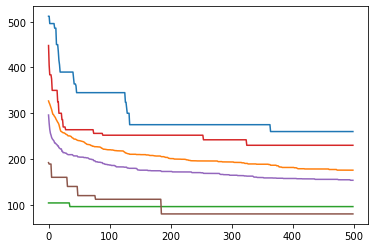

In [68]:
#Task 2.3
optimisation()

maxListSwap = []
meanListSwap = []
minListSwap = []

maxListRnr = []
meanListRnr = []
minListRnr = []
for i in range(0, len(swapFits[0])):
    valuesSwap = []
    valuesRnr = []
    for j in range(0, len(swapFits)):
            valuesSwap.append(swapFits[j][i])
            valuesRnr.append(rnrFits[j][i])
    maxListSwap.append(max(valuesSwap))
    meanListSwap.append(sum(valuesSwap)/len(valuesSwap))
    minListSwap.append(min(valuesSwap))
    maxListRnr.append(max(valuesRnr))
    meanListRnr.append(sum(valuesRnr)/len(valuesRnr))
    minListRnr.append(min(valuesRnr))
    
pyplot.plot(maxListSwap, label="Swap Mutation Maximum")
pyplot.plot(meanListSwap, label="Swap Mutation Average")
pyplot.plot(minListSwap, label="Swap Mutation Minimum")

pyplot.plot(maxListRnr, label="RnR Mutation Maximum")
pyplot.plot(meanListRnr, label="RnR Mutation Average")
pyplot.plot(minListRnr, label="RnR Mutation Minimum")

